In [1]:
import numpy as np
import pandas as pd
from time_series import TimeSeries
from utils import load_data, time_series_model_runner
from models import (
    NaiveMean,
    LinearRegression,
    RandomForest,
    XGBoost,
    LSTM
)

Using TensorFlow backend.


In [3]:
gdp_data = load_data('../results/gdp.csv', 'gdp')
gov_balance_data = load_data('../results/government_balance.csv', 'gov_balance')
industry_stock_data = load_data('../results/industry_stock.csv', 'ind_stock')

data = gdp_data.join(gov_balance_data).join(industry_stock_data)
gdp_time_series = TimeSeries(
    data,
    noise_level=0.05,
    train_perc=0.8,
    target_cols=['gdp_country_{}'.format(i) for i in range(1, 5)]
)
run_gdp_model = time_series_model_runner(time_series=gdp_time_series)

Train error: 1858.30779598
Test error: 1856.85990949


/usr/local/lib/python2.7/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


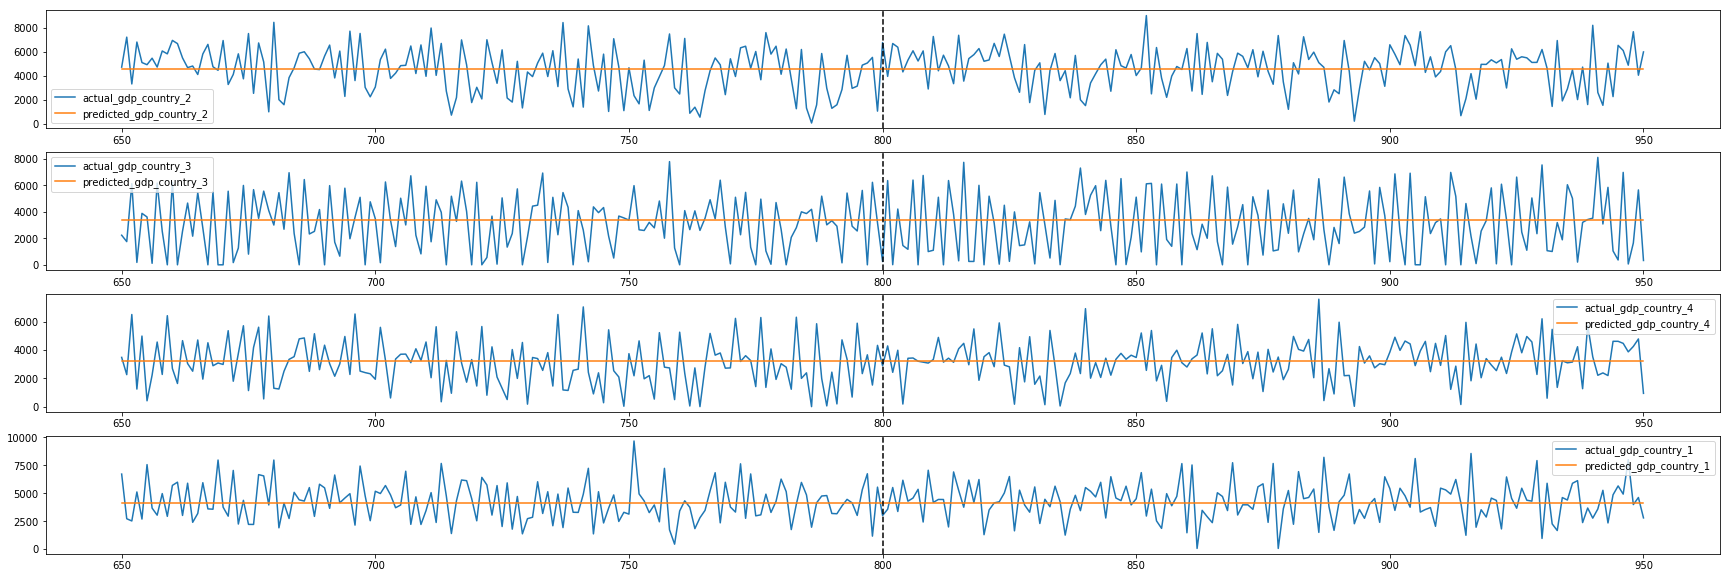

In [3]:
nm = run_gdp_model(NaiveMean)

/usr/local/lib/python2.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


Train error: 1115.60633287
Test error: 1146.10288531


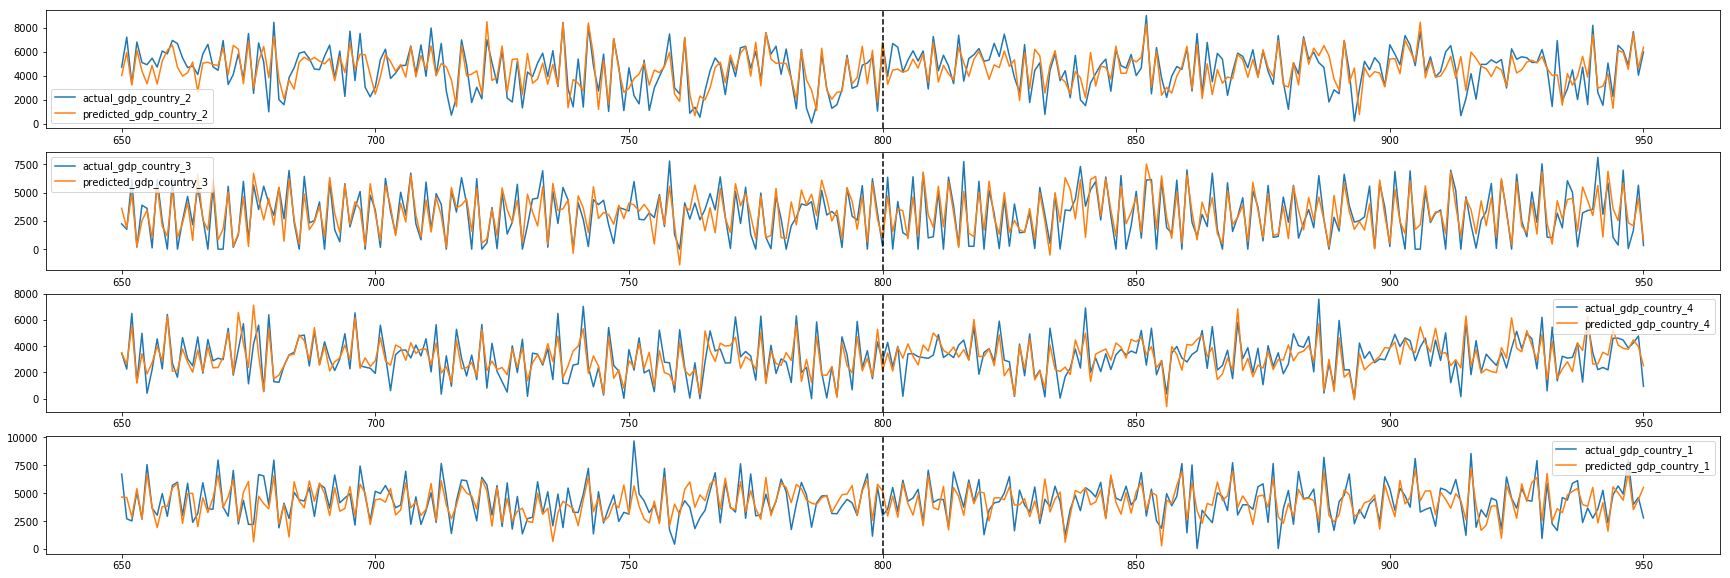

In [4]:
lr = run_gdp_model(LinearRegression, n_lookback=5)

Train error: 1474.52189181
Test error: 1546.63913279


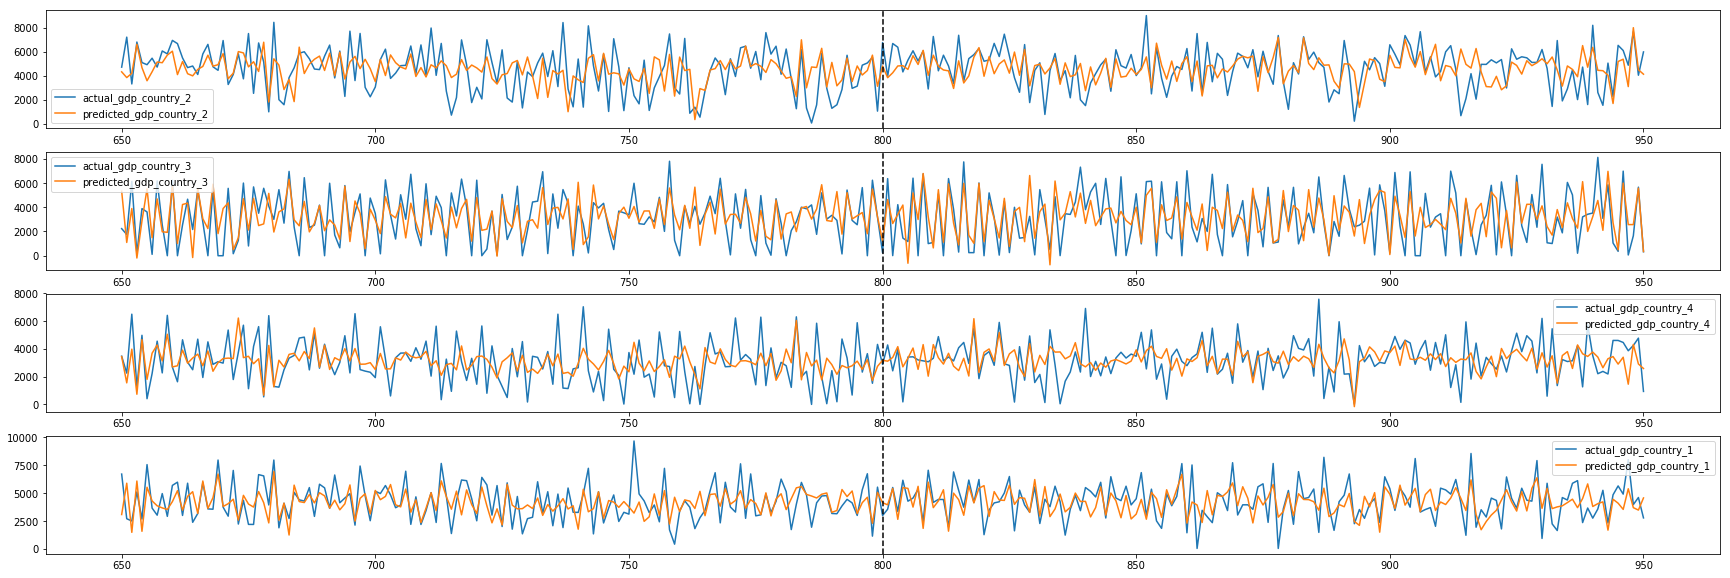

In [5]:
lr_5 = run_gdp_model(LinearRegression, n_lookback=8, n_lookahead=5)

Train error: 495.57282893
Test error: 1256.89682914


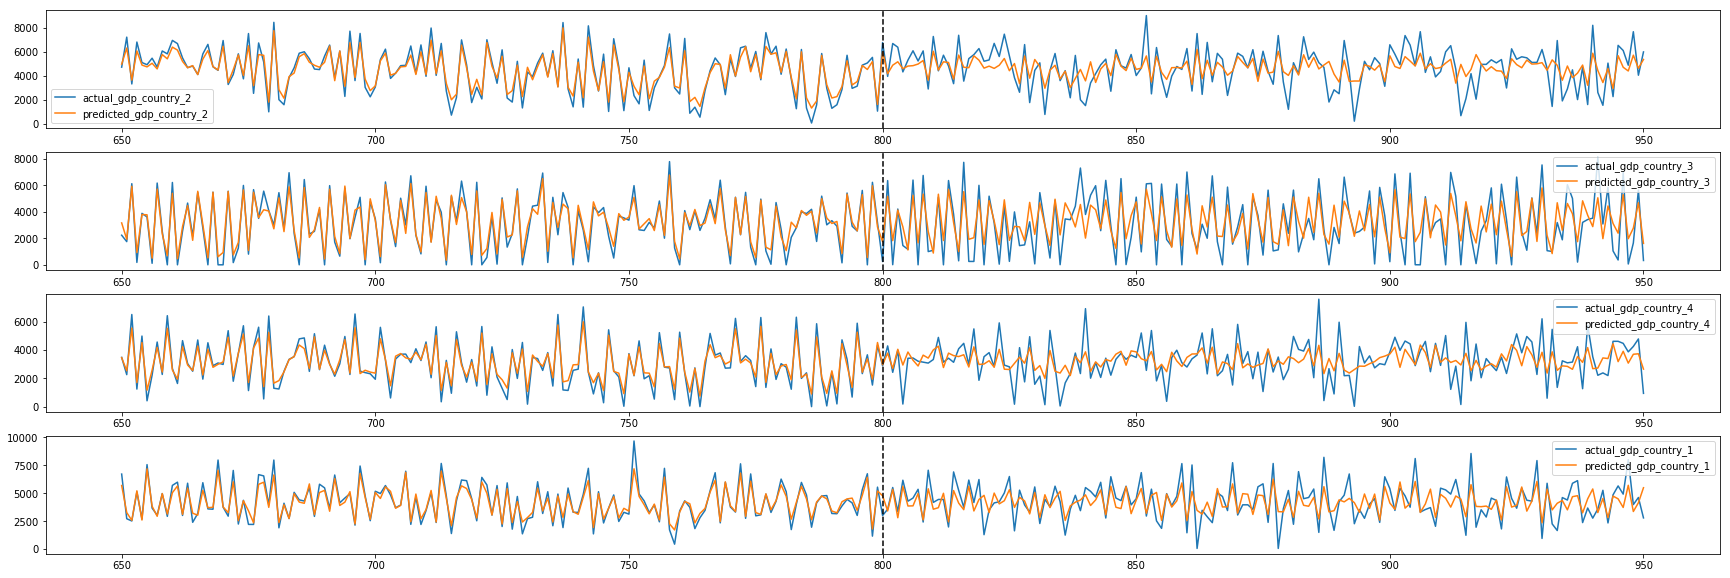

In [6]:
rf = run_gdp_model(RandomForest, n_lookback=5)

Train error: 614.904603506
Test error: 1578.72821154


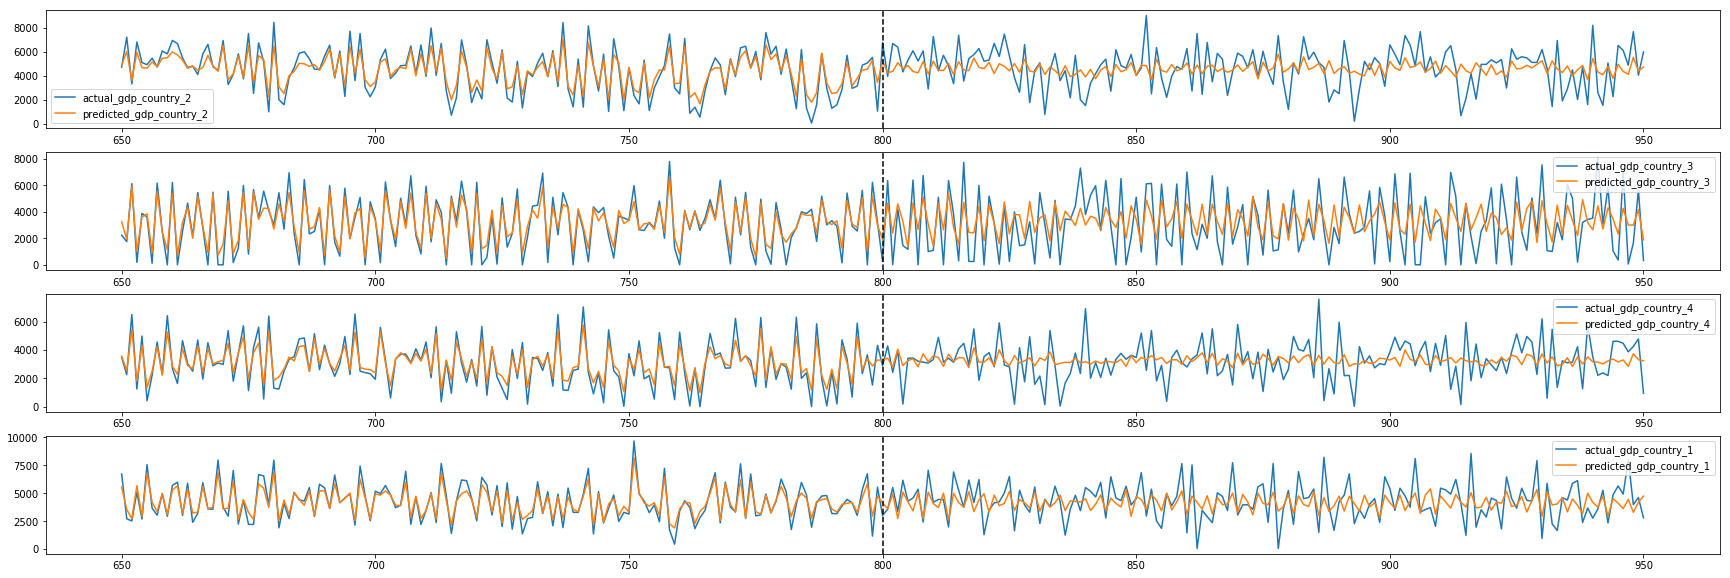

In [16]:
rf_5 = run_gdp_model(RandomForest, n_lookback=8, n_lookahead=5)

Train error: 210.685942047
Test error: 1087.61918774


/usr/local/lib/python2.7/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


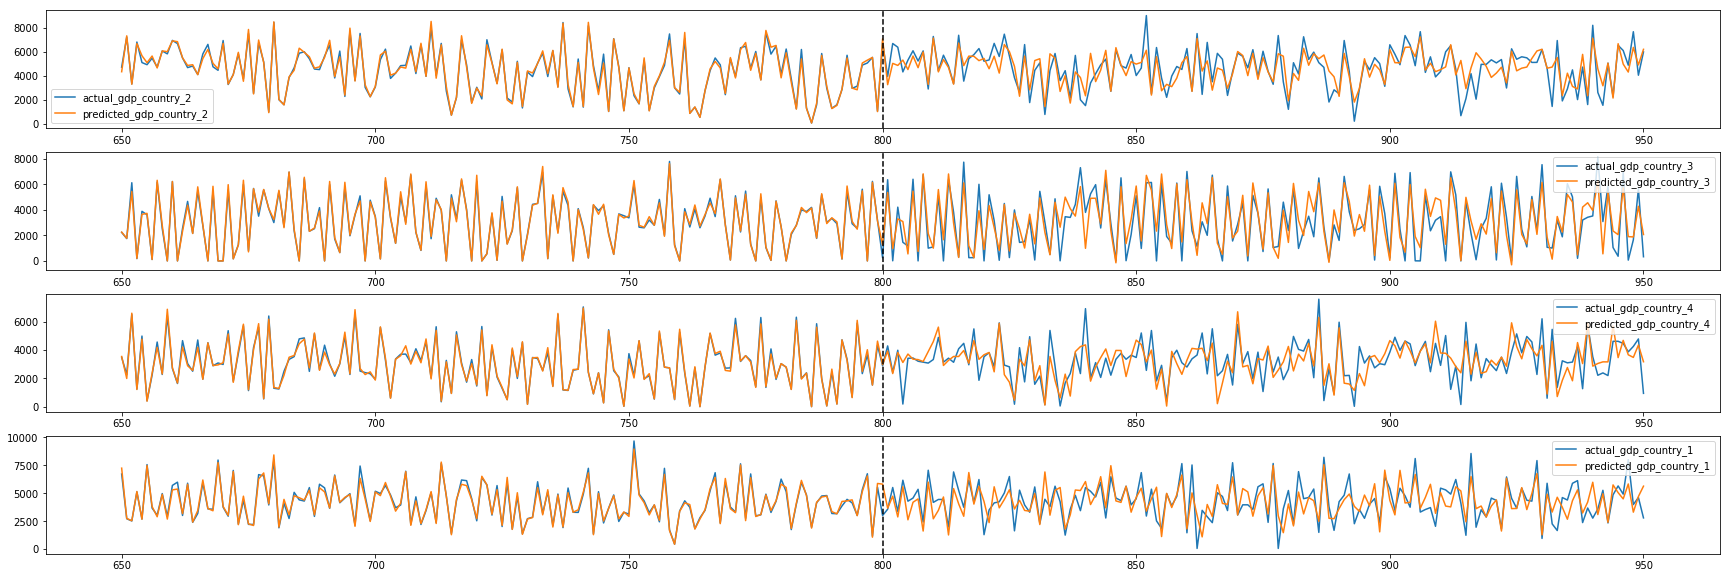

In [4]:
xgb = run_gdp_model(XGBoost, n_lookback=5)

Train error: 220.175247134
Test error: 1548.11491438


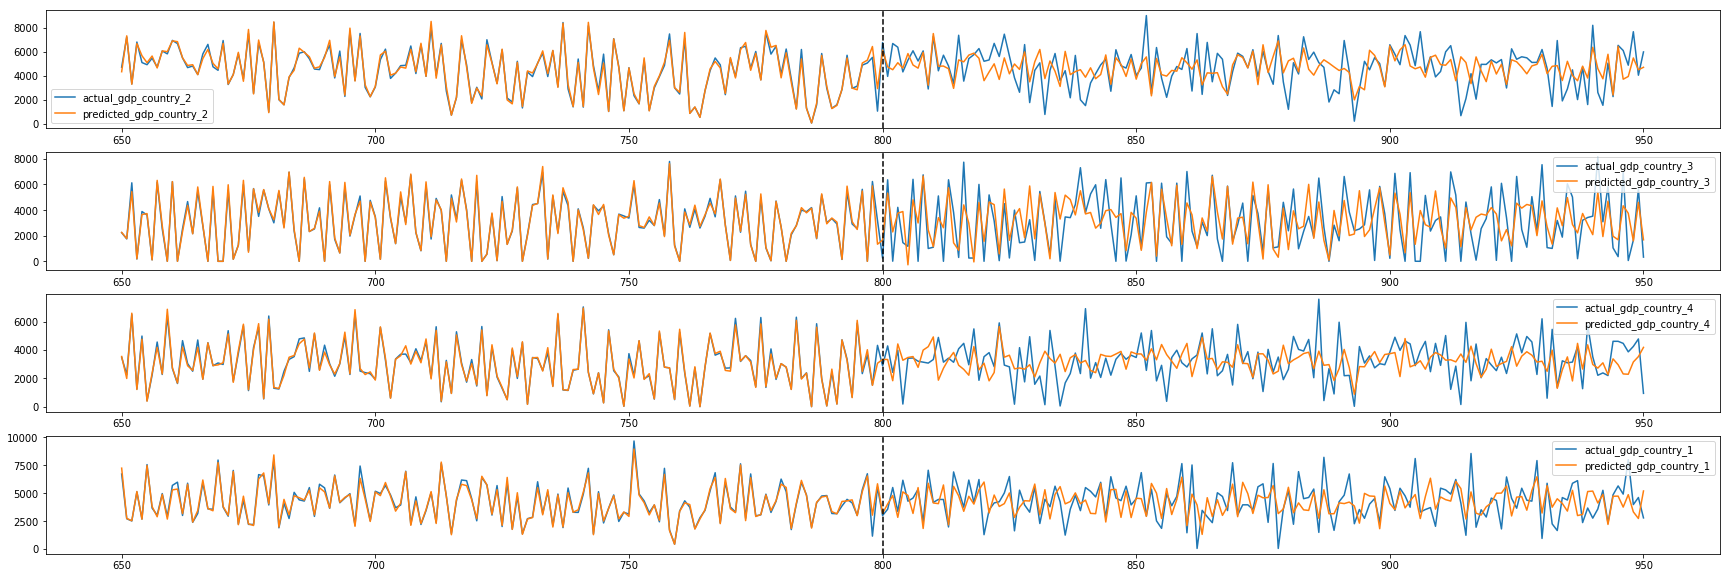

In [10]:
xgb_5 = run_gdp_model(XGBoost, n_lookback=8, n_lookahead=5, n_estimators=1000)

Train error: 944.727970289
Test error: 1085.98370781


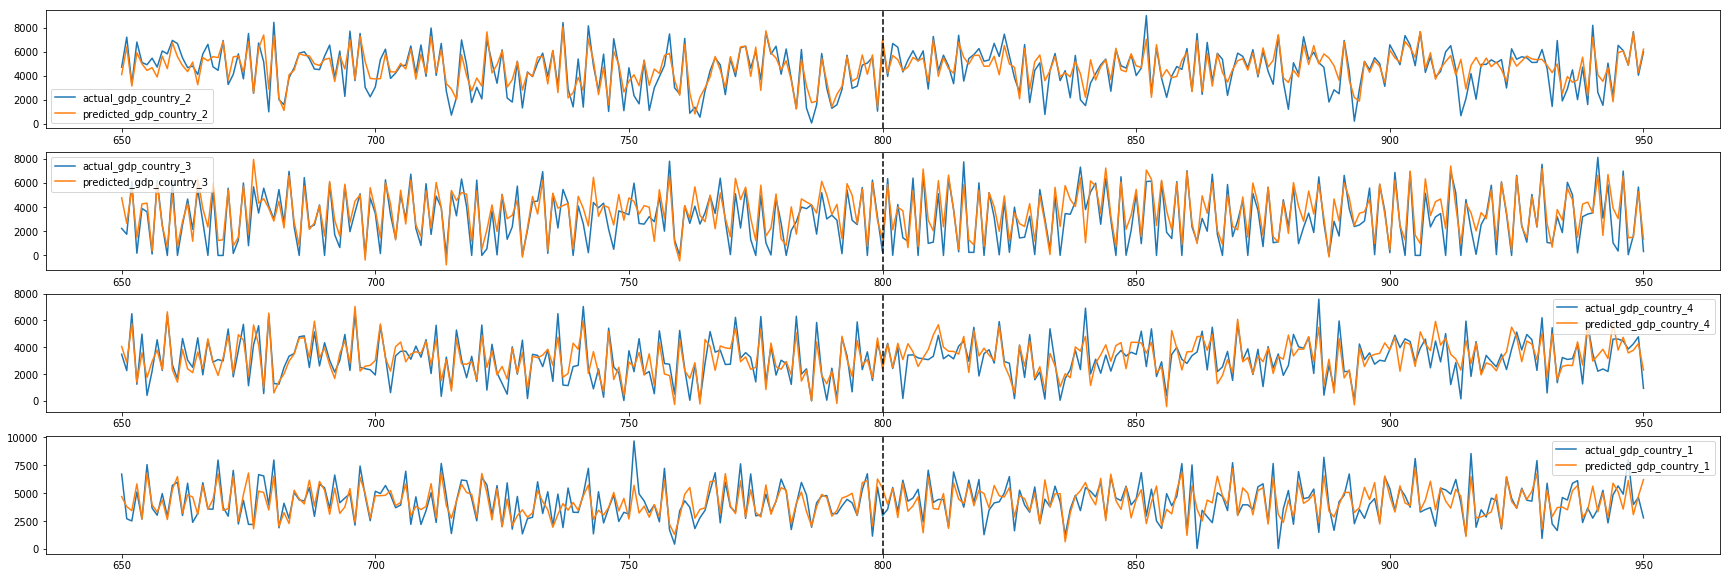

In [7]:
lstm = run_gdp_model(LSTM, n_lookback=5)

Train error: 1360.01543816
Test error: 1530.43738765


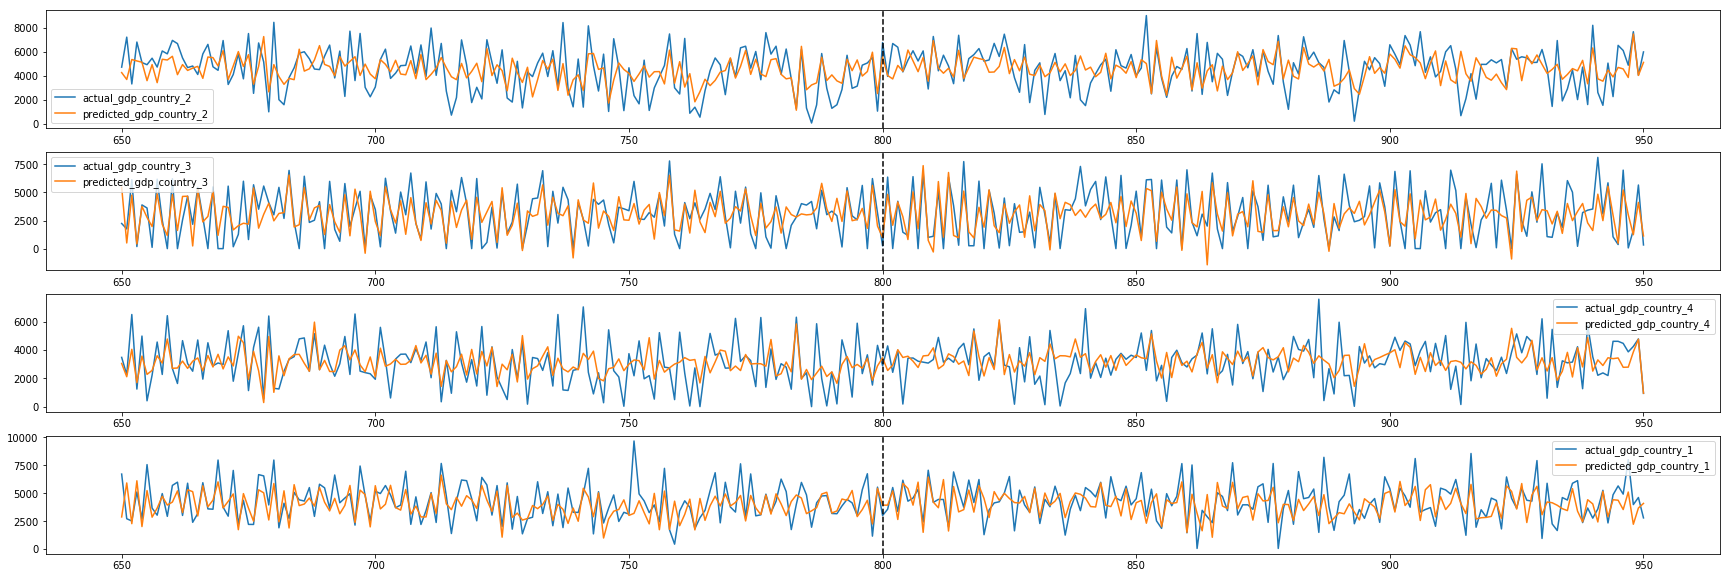

In [14]:
lstm_5 = run_gdp_model(LSTM, n_lookback=8, n_lookahead=5)